# Efficiency LIANA+

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix

import scanpy as sc
import liana as li

from itertools import product

import psutil
from timeit import default_timer as timer

import gc

In [2]:
from benchmark import _benchmark, _sample_anndata, _sample_resource

## Single-cell

In [3]:
# Define Methods
def cpdb_no_perms(**kwargs):
    li.mt.cellphonedb(**kwargs, n_perms=None)
def cellchat_no_perms(**kwargs):
    li.mt.cellchat(**kwargs, n_perms=None)
def magnitude_only(**kwargs):
    li.mt.rank_aggregate(**kwargs, n_perms=None)
def rank_aggregate(**kwargs):
    aggregate = li.mt.AggregateClass(li.mt.aggregate_meta, methods=[li.mt.logfc,
                                                                    li.mt.cellphonedb,
                                                                    # TODO: get rid of CellChat all together??
                                                                    # li.mt.cellchat,
                                                                    li.mt.natmi,
                                                                    li.mt.connectome,
                                                                    li.mt.singlecellsignalr
                                                                    ]
                                          )
    aggregate(**kwargs)

methods = {
    "CellPhoneDB": li.mt.cellphonedb,
    # "CellChat": li.mt.cellchat,
    "CellPhoneDB_NP": cpdb_no_perms,
    "CellChat_NP": cellchat_no_perms,
    "Consensus": rank_aggregate,
    "Magnitude": magnitude_only,
    "NATMI": li.mt.natmi,
    "Connectome": li.mt.connectome,
    "log2FC": li.mt.logfc,
    }

In [4]:
benchmark_stats = pd.DataFrame(columns=["method", "n_obs", "time", "memory"])

obs_range = [50000, 10000, 5000, 1000, 100000]

for n_obs in obs_range:
    print(n_obs)
    adata = _sample_anndata(n_obs=n_obs)
    resource = _sample_resource(adata, n_lrs=3000)
        
    for method in methods.keys():
        for _ in range(5):
            print(method)
            time, memory = _benchmark(function=methods[method],
                                      adata=adata,
                                      resource=resource,
                                      groupby='cell_type',
                                      use_raw=False,
                                      verbose=False
                                      )
            benchmark_stats.loc[len(benchmark_stats)] = [method, n_obs, time, memory]
    benchmark_stats.to_csv("sc_stats.csv", index=False)
    
    gc.collect()

50000
 NNZ fraction: 0.10000397
CellPhoneDB
CellPhoneDB
CellPhoneDB


KeyboardInterrupt: 

## Local Spatial Scores

In [5]:
import squidpy as sq
import scanpy as sc
import pandas as pd
from itertools import product

In [6]:
# NOTE: I'm not benchmarking masked_pearson here cuz it's much less efficient than any other score
methods = ["cosine", "jaccard", "spearman", "pearson", "morans"] # , "masked_spearman"

In [7]:
obs_list = ["xenium", 1000, 2500, 5000, 10000, 25000]

In [8]:
benchmark_stats = pd.DataFrame(columns=["method", "n_obs", "time", "memory"])

for n_obs in obs_list:
    print(n_obs)
    
    if isinstance(n_obs, int):
        adata = _sample_anndata(n_obs=n_obs)
        resource = _sample_resource(adata, n_lrs=500)
    elif (n_obs=="xenium"):
        adata = sc.read_h5ad("xenium.h5ad")
        resource = adata.uns['resource']
        
    for method in methods:
        print(method)
        
        for _ in range(5):
            time, memory = _benchmark(function=li.mt.lr_bivar, 
                                      adata=adata, 
                                      function_name=method, n_perms=None,
                                      use_raw=False,
                                      positive_only=False, verbose=True,
                                      resource=resource
                                      )
            benchmark_stats.loc[len(benchmark_stats)] = [method, n_obs, time, memory]
    benchmark_stats.to_csv("sp_stats.csv", index=False)

xenium
cosine
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
jaccard
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
spearman
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
pearson
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
morans
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


1000
 NNZ fraction: 0.0998465
cosine
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
jaccard
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
spearman
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
pearson
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
morans
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


2500
 NNZ fraction: 0.099789
cosine
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
jaccard
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
spearman
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
pearson
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
morans
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


5000
 NNZ fraction: 0.0999908
cosine
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
jaccard
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
spearman
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
pearson
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
morans
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10000
 NNZ fraction: 0.0999469
cosine
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
jaccard
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
spearman
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
pearson
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
morans
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


25000
 NNZ fraction: 0.10006314
cosine
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
jaccard
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
spearman
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
pearson
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
Using `.X`!
morans
Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Using `.X`!


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_spatial_pipe.py:354: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Plot Results

In [79]:
import plotnine as p9

In [80]:
benchmark_stats = pd.read_csv("sp_stats.csv")


In [86]:
# ints to name & as category
benchmark_stats['n_obs'] = benchmark_stats['n_obs'].astype('category')
benchmark_stats['dataset'] = benchmark_stats['n_obs'].astype(str).replace({
    '1000': "1k",
    '2500': "2.5k",
    '5000': "5k",
    '10000': "10k",
    '25000': "25k",
    "xenium": "Xenium (164k)"}).astype('category')


In [89]:
# order
benchmark_stats['dataset'].cat.reorder_categories(['1k', '2.5k', '5k', '10k', '25k', "Xenium (164k)",], inplace=True)


benchmark_stats['method'] = benchmark_stats['method'].astype('category')

/tmp/ipykernel_1242819/1311216060.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


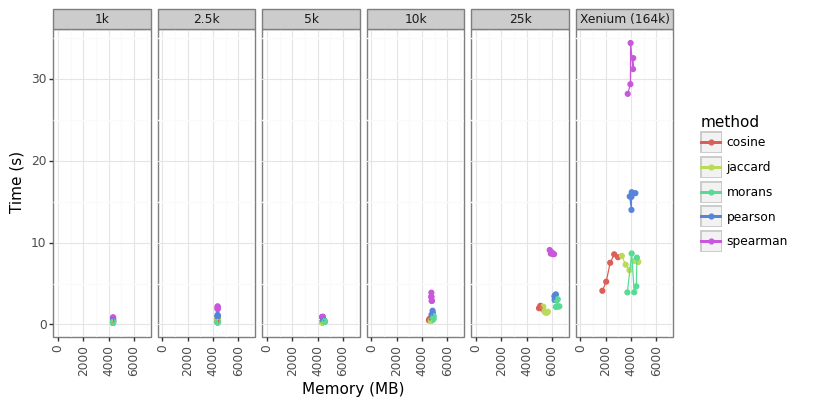

<ggplot: (8727488545207)>

In [90]:
(
    p9.ggplot(benchmark_stats, p9.aes(x="memory", y="time", color="method")) + 
    p9.geom_point() +
    p9.geom_line() +
    p9.theme_bw() +
    p9.facet_grid("~ dataset" ) +
    p9.labs(x="Memory (MB)", y="Time (s)") +
    # rotate
    p9.theme(axis_text_x = p9.element_text(angle = 90), figure_size=(8, 4)) +
    # xlim
    p9.scale_x_continuous(limits=(0, 7000))
)

In [ ]:
# y = time in seconds, x = RAM; color = method; grid by n_obs # + add a Xenium and a Visium slide for space
# or two plots one for time and one for RAM

Do I also do it on a single Xenium + Visium slide; add as dot to the plots; i.e. check n_obs and slap it there?